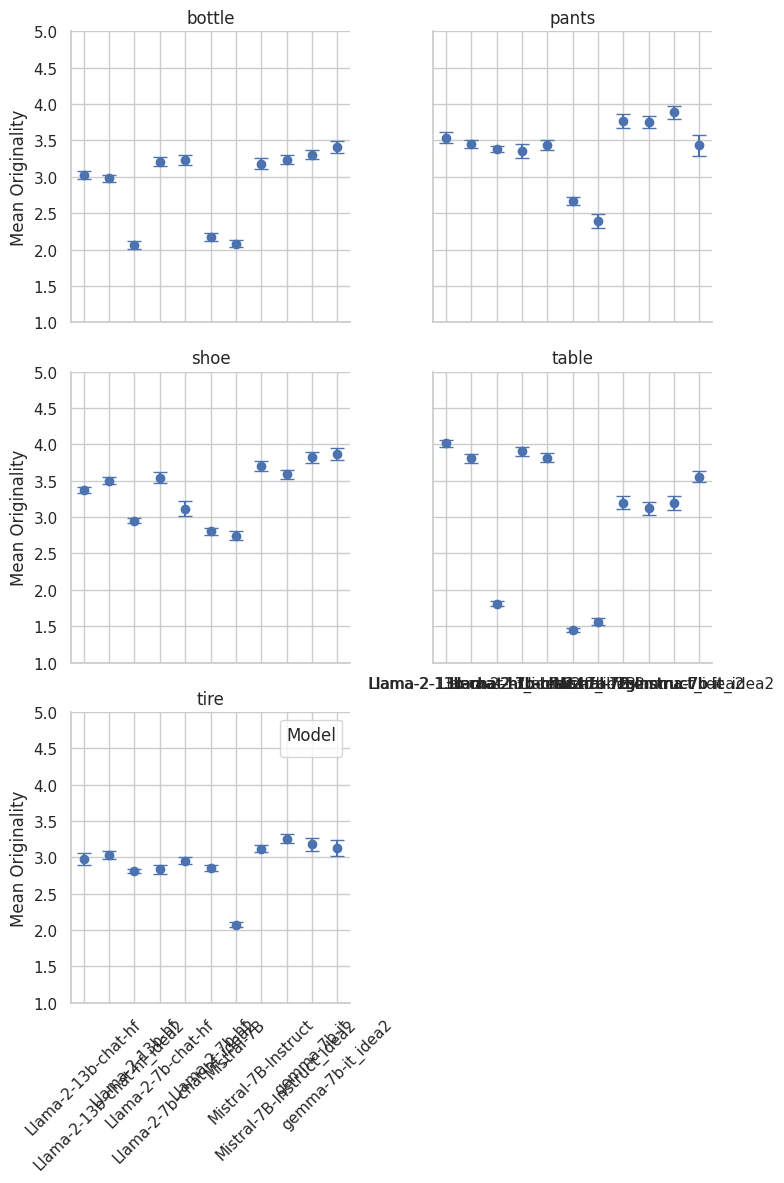

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Path to the folder containing the CSV files
folder_path = '/content/sample_data/datasets'

# Read and combine all CSV files
all_data = []
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        model_name = filename.split('.')[0]  # Extract model name from the filename
        df = pd.read_csv(os.path.join(folder_path, filename))
        df['model'] = model_name  # Add model name as a column
        all_data.append(df)

# Combine into a single DataFrame
df_combined = pd.concat(all_data, ignore_index=True)

# Calculate mean originality and standard error for each model and item
stats_df = df_combined.groupby(['model', 'item'])['originality'].agg(['mean', 'sem']).reset_index().rename(columns={'mean': 'Mean Originality', 'sem': 'SEM'})

# Initialize the plot
g = sns.FacetGrid(stats_df, col="item", height=4, aspect=1, col_wrap=2, sharey=True)
g.set(ylim=(1, 5))

# Function to plot with error bars
def plot_with_error_bars(data, **kwargs):
    models = data['model'].unique()
    for model in models:
        subset = data[data['model'] == model]
        plt.errorbar(model, subset['Mean Originality'], yerr=subset['SEM'], fmt='o', capsize=5, **kwargs)

# Map the custom plotting function to each subplot/facet
g.map_dataframe(plot_with_error_bars)

# Post-plotting adjustments
g.set_titles("{col_name}")
g.set_axis_labels("", "Mean Originality")
plt.xticks(rotation=45)  # Rotate model names for clarity

# Adjust legend
plt.legend(title='Model')

plt.tight_layout()
plt.show()

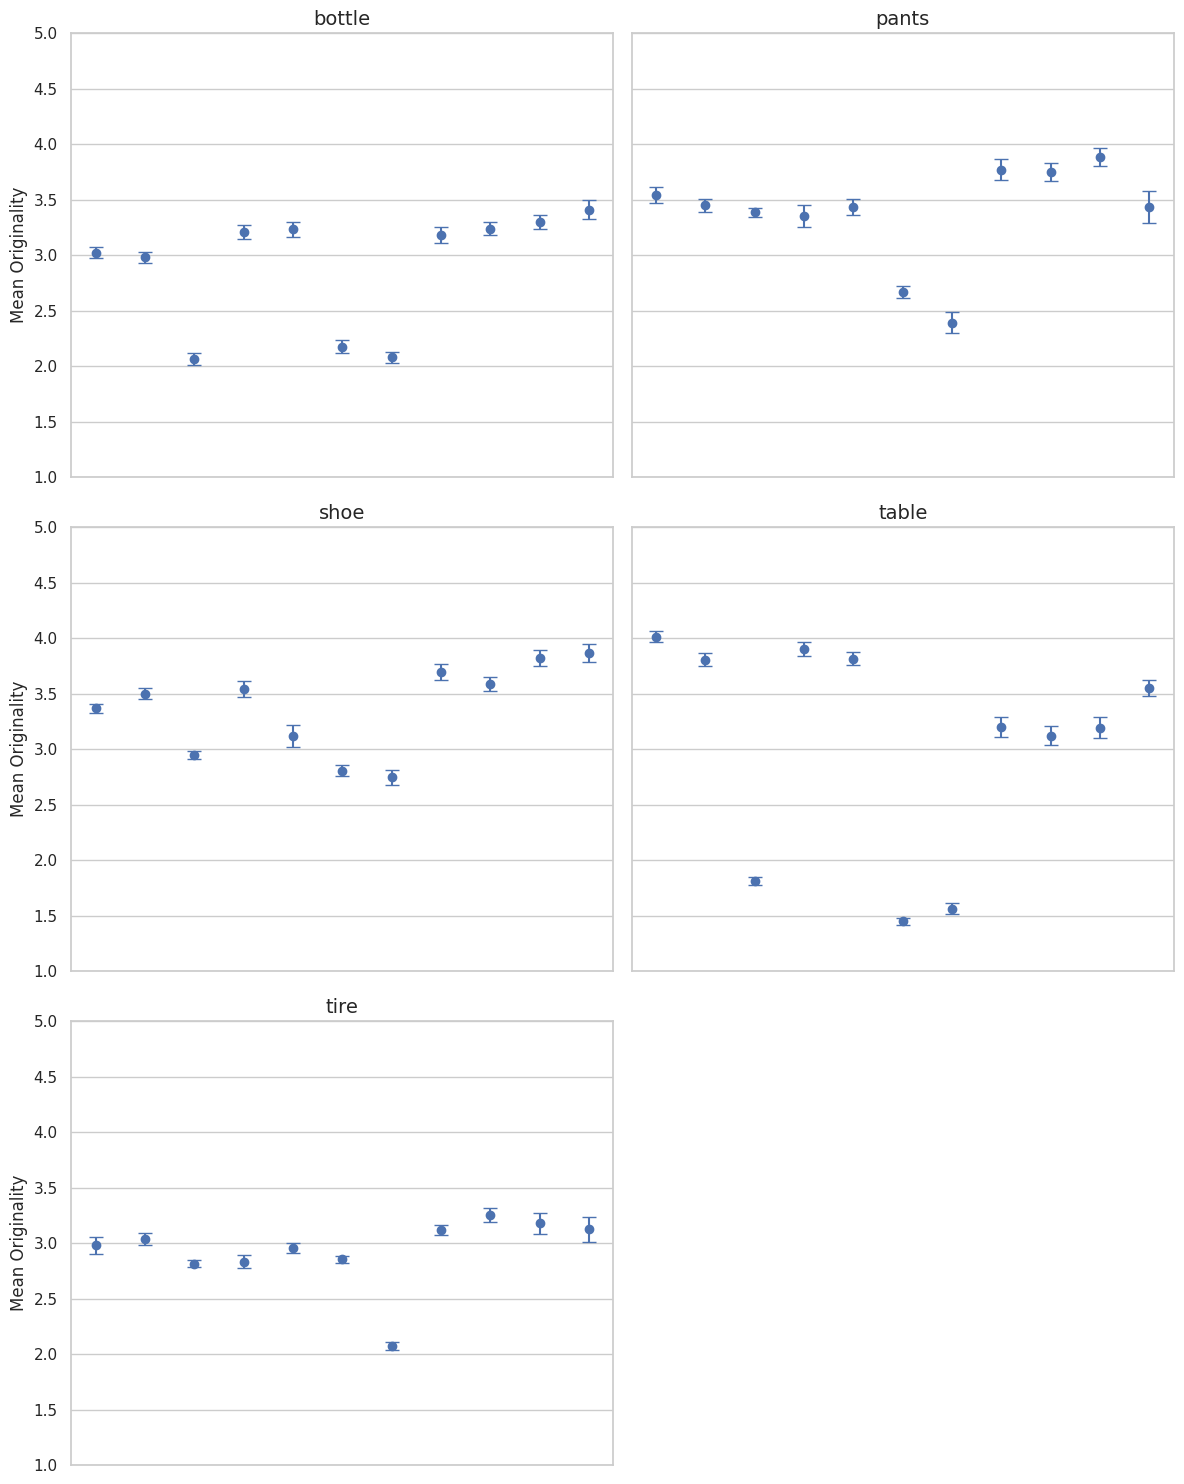

In [ ]:
import matplotlib.ticker as ticker

# Adjust the initial setup for the FacetGrid to increase overall figure size and modify aspect ratio
g = sns.FacetGrid(stats_df, col="item", height=5, aspect=1.2, col_wrap=2, sharey=True, despine=False)
g.set(ylim=(1, 5))

# Function to plot with error bars, including adjustments for x-axis label readability
def plot_with_error_bars(data, **kwargs):
    # Sort models to ensure consistent order across plots
    sorted_models = data['model'].unique()
    sorted_models.sort()
    x_positions = range(len(sorted_models))  # Assign x positions based on sorted models

    means = [data[data['model'] == model]['Mean Originality'].values[0] for model in sorted_models]
    sems = [data[data['model'] == model]['SEM'].values[0] for model in sorted_models]

    plt.errorbar(x_positions, means, yerr=sems, fmt='o', capsize=5, **kwargs)
    plt.xticks(x_positions, sorted_models, rotation=45, ha="right")  # Rotate and align right for better readability

# Apply the custom plotting function
g.map_dataframe(plot_with_error_bars)

# Post-plotting adjustments for a cleaner, Tufte-inspired look
g.set_titles("{col_name}", size=14)
g.set_axis_labels("", "Mean Originality")
g.set(xticks=[])  # Hide x-ticks to clean up the plot; x-labels are set in the plotting function

# Optional: Adjust subplot spacing and layout
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9, hspace=0.4, wspace=0.3)

plt.tight_layout()
plt.show()


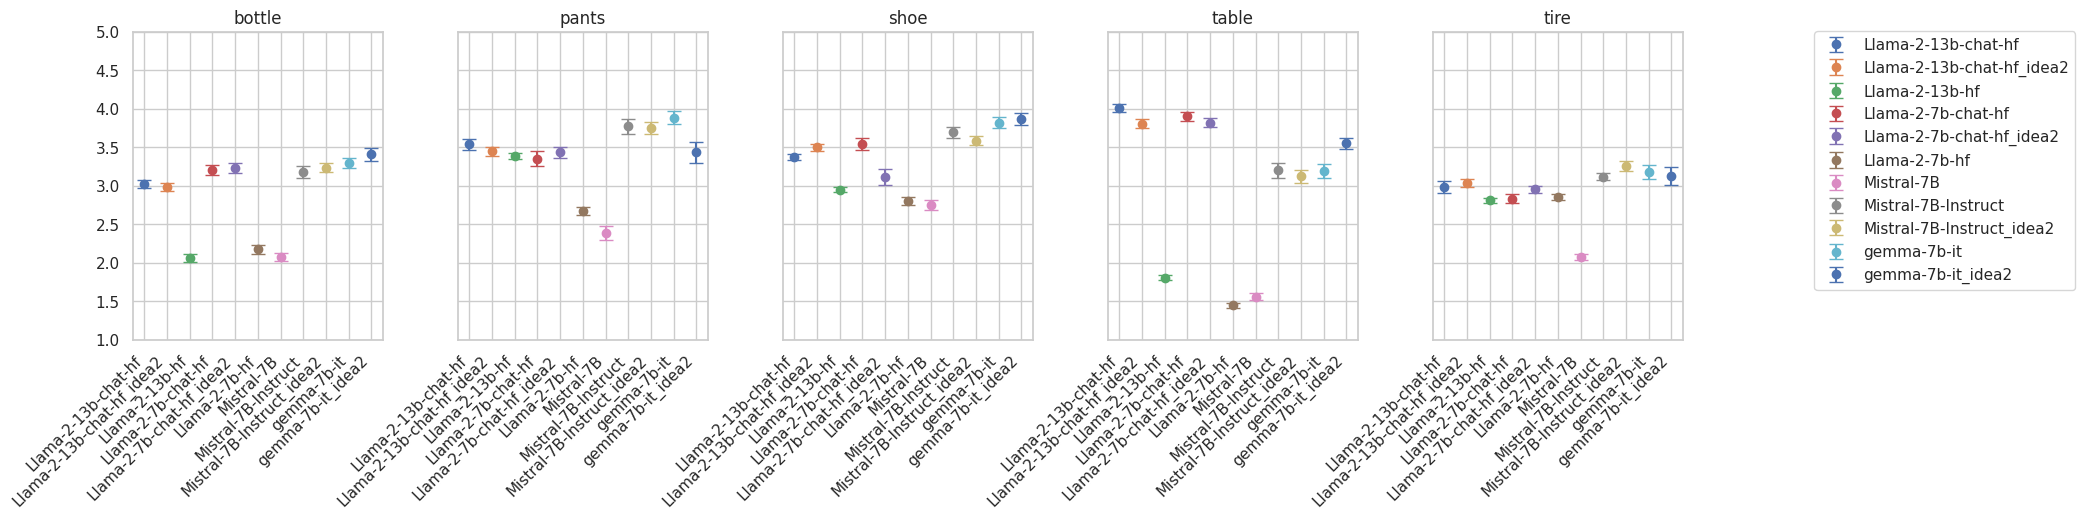

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming stats_df is prepared with 'model', 'item', 'Mean Originality', and 'SEM' columns
# Example stats_df preparation (ensure this matches your actual data structure):
# stats_df = pd.DataFrame({
#     'model': ['Model1', 'Model1', 'Model2', 'Model2'],
#     'item': ['Item1', 'Item2', 'Item1', 'Item2'],
#     'Mean Originality': [3.5, 2.5, 4, 3],
#     'SEM': [0.1, 0.2, 0.15, 0.25]
# })

sns.set_theme(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Iterate over each unique item to create its subplot
for ax, (item, item_df) in zip(axes, stats_df.groupby('item')):
    # For each model within the item, plot the mean originality and error bars
    for _, row in item_df.iterrows():
        ax.errorbar(row['model'], row['Mean Originality'], yerr=row['SEM'], fmt='o', capsize=5, label=row['model'])

    ax.set_title(item)
    ax.set_ylim(1, 5)  # Set y-axis limits
    ax.set_xticks(range(len(item_df['model'].unique())))  # Set x-ticks based on the number of models
    ax.set_xticklabels(item_df['model'].unique(), rotation=45, ha="right")  # Optionally, set custom x-tick labels

# Adjust subplot parameters for a clean layout
plt.subplots_adjust(wspace=0.3)

# Add a single legend outside the rightmost subplot
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 0.9))

plt.show()


In [ ]:
# Assuming 'stats_df' is your DataFrame

# Format the 'SEM' column to show it alongside mean originality as "mean (SEM)"
stats_df['Originality (SEM)'] = stats_df.apply(lambda row: f"{row['Mean Originality']:.2f} ({row['SEM']:.2f})", axis=1)

# Select and rename columns for the final table
final_table_df = stats_df[['item', 'model', 'Originality (SEM)']].copy()
final_table_df.rename(columns={'item': 'Item', 'model': 'Model', 'Originality (SEM)': 'Originality (Standard Error)'}, inplace=True)

# Sort the DataFrame for better readability, if needed
final_table_df.sort_values(by=['Item', 'Model'], inplace=True)

# Optionally, reset index for the final table
final_table_df.reset_index(drop=True, inplace=True)

# Display the final table, for verification
print(final_table_df)

# Export the table to a file, e.g., LaTeX, CSV, or Excel
# To export as LaTeX (common for academic papers):
latex_table_str = final_table_df.to_latex(index=False, column_format='lcc', longtable=True)

# Writing the LaTeX table string to a .tex file
with open('originality_table.tex', 'w') as file:
    file.write(latex_table_str)

# Alternatively, to export as CSV:
final_table_df.to_csv('originality_table.csv', index=False)

# Or as Excel:
final_table_df.to_excel('originality_table.xlsx', index=False)


      Item                      Model Originality (Standard Error)
0   bottle        Llama-2-13b-chat-hf                  3.02 (0.05)
1   bottle  Llama-2-13b-chat-hf_idea2                  2.98 (0.05)
2   bottle             Llama-2-13b-hf                  2.06 (0.05)
3   bottle         Llama-2-7b-chat-hf                  3.21 (0.06)
4   bottle   Llama-2-7b-chat-hf_idea2                  3.23 (0.07)
5   bottle              Llama-2-7b-hf                  2.17 (0.06)
6   bottle                 Mistral-7B                  2.08 (0.05)
7   bottle        Mistral-7B-Instruct                  3.18 (0.07)
8   bottle  Mistral-7B-Instruct_idea2                  3.24 (0.06)
9   bottle                gemma-7b-it                  3.30 (0.06)
10  bottle          gemma-7b-it_idea2                  3.41 (0.08)
11   pants        Llama-2-13b-chat-hf                  3.54 (0.07)
12   pants  Llama-2-13b-chat-hf_idea2                  3.45 (0.06)
13   pants             Llama-2-13b-hf                  3.39 (0

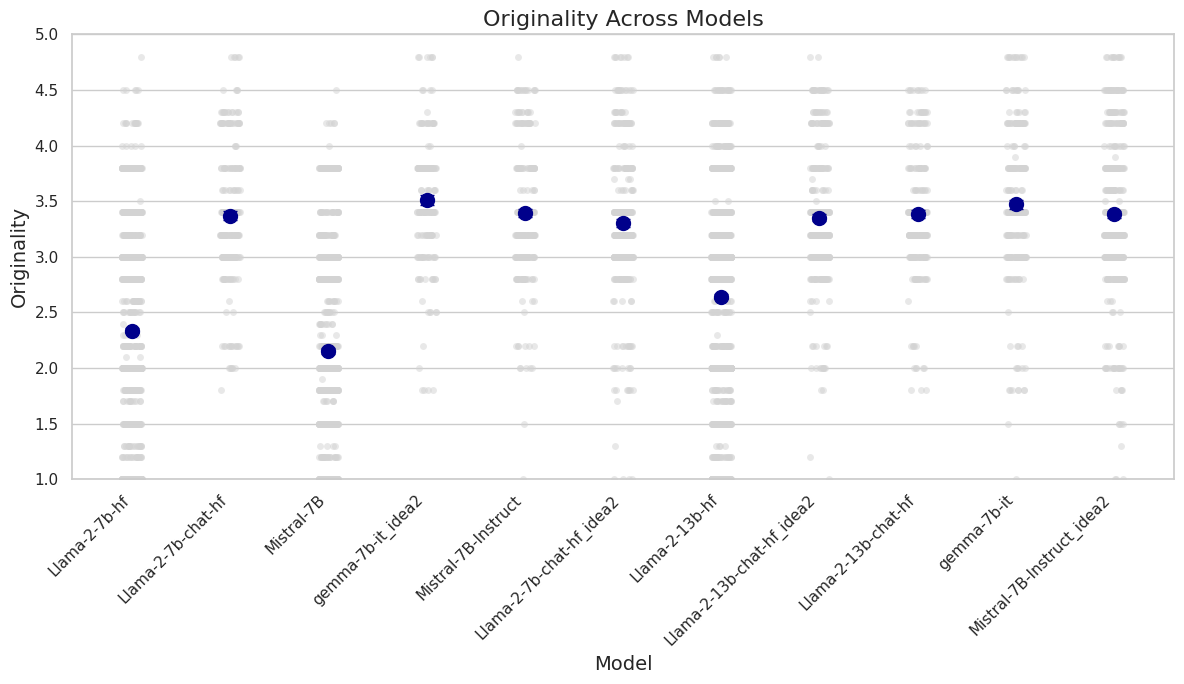

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import sem

# Assuming 'df_combined' is your dataset containing 'model' and 'originality' columns

# Calculate mean and SEM for each model
model_grouped = df_combined.groupby('model')['originality'].agg(
    mean_originality='mean',
    sem_originality=sem
).reset_index()

# Sort models by their mean originality for a sequential presentation
model_grouped.sort_values('mean_originality', inplace=True)

# Setting up the plot
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# First, plot the individual points to create a background layer
sns.stripplot(x='model', y='originality', data=df_combined, color='lightgray', alpha=0.5, jitter=True, zorder=1)

# Next, overlay the mean originality points with larger, more distinct markers
for _, row in model_grouped.iterrows():
    plt.errorbar(x=row['model'], y=row['mean_originality'], yerr=row['sem_originality'], fmt='o', color='darkblue', capsize=5, markersize=10, zorder=2)

plt.xlabel('Model', fontsize=14)
plt.ylabel('Originality', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('Originality Across Models', fontsize=16)
plt.ylim(1, 5)  # Enforcing the specified y-axis range

plt.tight_layout()
plt.show()


In [ ]:
# Ensure 'model_grouped' contains your aggregated data with 'model', 'mean_originality', and 'sem_originality'

# Rename columns for clarity in the paper
model_grouped.rename(columns={
    'model': 'Model',
    'mean_originality': 'Mean Originality',
    'sem_originality': 'SEM'
}, inplace=True)

# Optionally, format the 'Mean Originality' and 'SEM' columns for presentation
model_grouped['Mean Originality'] = model_grouped['Mean Originality'].map('{:.2f}'.format)
model_grouped['SEM'] = model_grouped['SEM'].map('{:.2f}'.format)

# Display the table to ensure it looks correct
print(model_grouped)



                        Model Mean Originality   SEM
6                  Mistral-7B             2.15  0.03
5               Llama-2-7b-hf             2.34  0.02
2              Llama-2-13b-hf             2.64  0.02
4    Llama-2-7b-chat-hf_idea2             3.30  0.04
1   Llama-2-13b-chat-hf_idea2             3.35  0.03
3          Llama-2-7b-chat-hf             3.37  0.04
8   Mistral-7B-Instruct_idea2             3.38  0.03
0         Llama-2-13b-chat-hf             3.39  0.04
7         Mistral-7B-Instruct             3.39  0.04
9                 gemma-7b-it             3.47  0.04
10          gemma-7b-it_idea2             3.51  0.05


Diversity

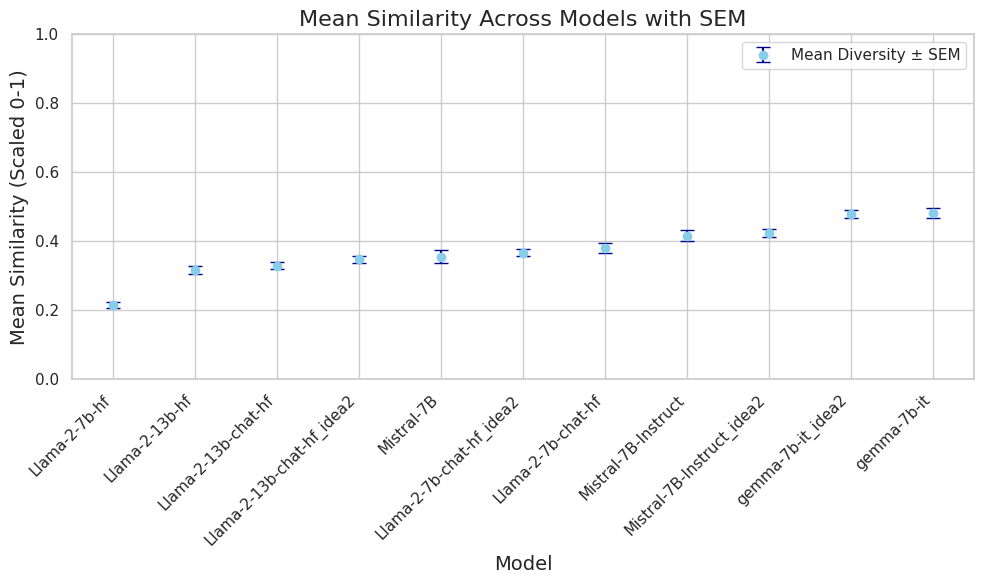

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import sem

# Assuming df_combined already exists and includes a 'diversity' column
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Group by model and session, then calculate mean diversity and SEM
diversity_stats = df_combined.groupby(['model', 'session_id'])['diversity'].agg(
    ['mean', 'sem']
).groupby('model').agg(
    Mean_Diversity=('mean', 'mean'),
    SEM=('sem', lambda x: np.sqrt(np.mean(x**2)))  # Combine SEMs from sessions within a model
).reset_index()

# Sort models by their mean diversity for plotting
diversity_stats.sort_values('Mean_Diversity', inplace=True)

# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plotting mean diversity for each model with SEM as error bars
plt.errorbar(diversity_stats['model'], diversity_stats['Mean_Diversity'], yerr=diversity_stats['SEM'], fmt='o', capsize=5, ecolor='darkblue', color='skyblue', label='Mean Diversity ± SEM')

# Enhancing plot aesthetics
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Similarity (Scaled 0-1)', fontsize=14)
plt.title('Mean Similarity Across Models with SEM', fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.ylim(0, 1)  # Ensure y-axis spans from 0 to 1 as diversity scores are scaled

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import sem

# Assuming 'df_combined' contains 'model' and 'diversity' columns

# Calculate mean diversity and SEM for each model
diversity_stats = df_combined.groupby('model')['diversity'].agg(
    Mean_Diversity='mean',
    SEM=sem
).reset_index()

# Renaming columns for clarity in the final table
diversity_stats.rename(columns={
    'model': 'Model',
    'Mean_Diversity': 'Mean Diversity',
    'SEM': 'SEM'
}, inplace=True)

# Display the table to ensure it's correctly prepared
print(diversity_stats)


                        Model  Mean Diversity       SEM
0         Llama-2-13b-chat-hf        0.329698  0.003755
1   Llama-2-13b-chat-hf_idea2        0.347830  0.003257
2              Llama-2-13b-hf        0.316664  0.003568
3          Llama-2-7b-chat-hf        0.379892  0.004732
4    Llama-2-7b-chat-hf_idea2        0.367720  0.003315
5               Llama-2-7b-hf        0.213788  0.003335
6                  Mistral-7B        0.352925  0.006175
7         Mistral-7B-Instruct        0.415946  0.005286
8   Mistral-7B-Instruct_idea2        0.425711  0.003759
9                 gemma-7b-it        0.480478  0.005472
10          gemma-7b-it_idea2        0.478890  0.004781


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import sem

# Group by 'model' and 'item', then calculate mean diversity and SEM
diversity_stats_by_item = df_combined.groupby(['model', 'item'])['diversity'].agg(
    Mean_Diversity='mean',
    SEM=sem
).reset_index()


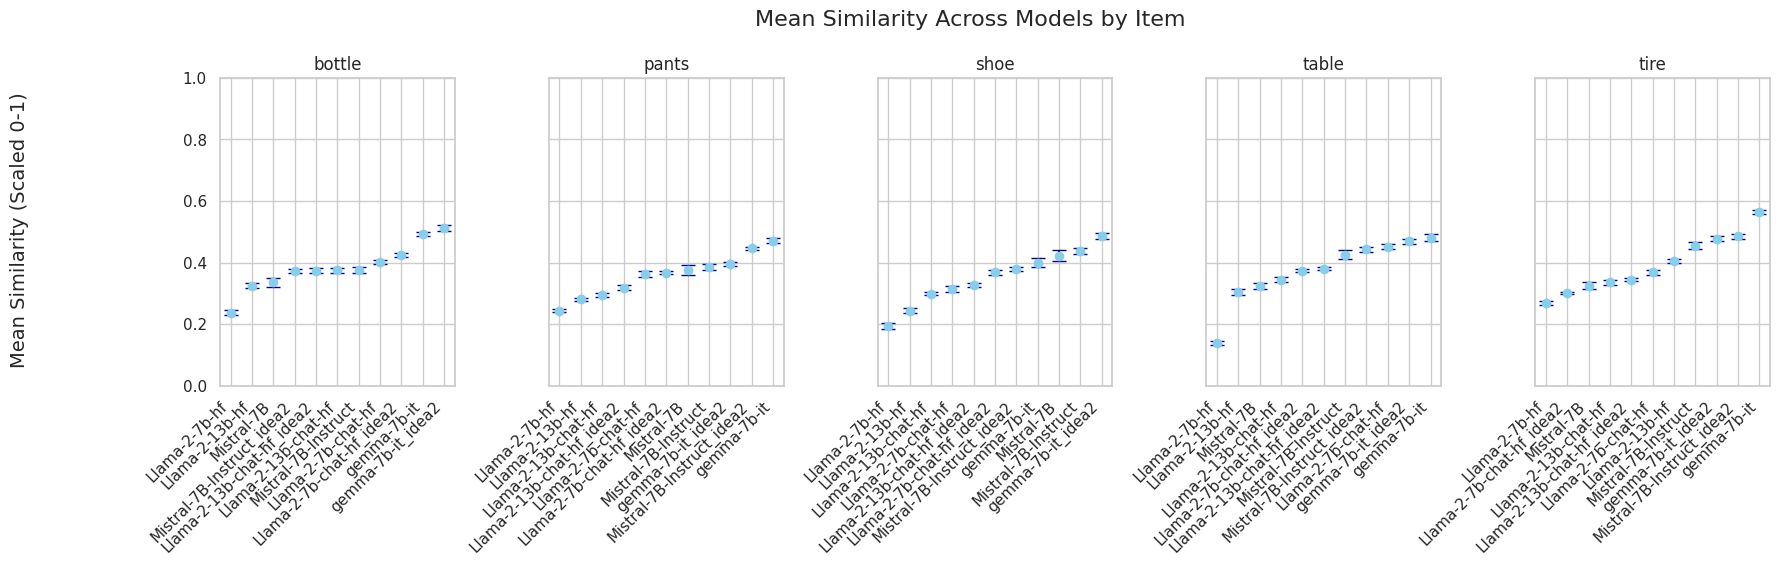

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming diversity_stats_by_item is prepared with 'model', 'item', 'Mean_Diversity', and 'SEM'

# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Determine the unique items to create a subplot for each
unique_items = diversity_stats_by_item['item'].unique()
n_items = len(unique_items)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, n_items, figsize=(20, 4), sharey=True)

if n_items == 1:  # If there's only one item, encapsulate axes in a list
    axes = [axes]

for ax, item in zip(axes, unique_items):
    # Filter data for the current item
    item_df = diversity_stats_by_item[diversity_stats_by_item['item'] == item]

    # Sort models for consistent plotting
    item_df = item_df.sort_values('Mean_Diversity')

    # Plot mean diversity and error bars for each model within this item
    ax.errorbar(item_df['model'], item_df['Mean_Diversity'], yerr=item_df['SEM'], fmt='o', capsize=5, ecolor='darkblue', color='skyblue', label='Mean Diversity ± SEM')

    # Set title and adjust ticks for the current subplot
    ax.set_title(item)
    ax.set_xticks(range(len(item_df['model'])))
    ax.set_xticklabels(item_df['model'], rotation=45, ha="right")
    ax.set_ylim(0, 1)  # Assuming diversity scores are scaled between 0 and 1

# Adjust layout
plt.subplots_adjust(wspace=0.4)

# Add a global y-label
fig.supylabel('Mean Similarity (Scaled 0-1)', fontsize=14)

# Set a common title
plt.suptitle('Mean Similarity Across Models by Item', fontsize=16, y=1.05)

plt.show()


In [ ]:
# Assuming diversity_stats_by_item contains 'model', 'item', 'Mean_Diversity', and 'SEM'

# Optionally, format the 'Mean_Diversity' and 'SEM' columns to round them for better readability
diversity_stats_by_item['Mean_Diversity'] = diversity_stats_by_item['Mean_Diversity'].round(3)
diversity_stats_by_item['SEM'] = diversity_stats_by_item['SEM'].round(3)

# Rename columns for clarity in the final table
diversity_stats_by_item.rename(columns={
    'model': 'Model',
    'item': 'Item',
    'Mean_Diversity': 'Mean Diversity',
    'SEM': 'Standard Error'
}, inplace=True)

# Display the table to ensure it looks as expected
print(diversity_stats_by_item)



                        Model    Item  Mean Diversity  Standard Error
0         Llama-2-13b-chat-hf  bottle           0.375           0.008
1         Llama-2-13b-chat-hf   pants           0.294           0.007
2         Llama-2-13b-chat-hf    shoe           0.299           0.005
3         Llama-2-13b-chat-hf   table           0.345           0.008
4         Llama-2-13b-chat-hf    tire           0.336           0.008
5   Llama-2-13b-chat-hf_idea2  bottle           0.374           0.009
6   Llama-2-13b-chat-hf_idea2   pants           0.319           0.009
7   Llama-2-13b-chat-hf_idea2    shoe           0.327           0.006
8   Llama-2-13b-chat-hf_idea2   table           0.380           0.005
9   Llama-2-13b-chat-hf_idea2    tire           0.344           0.005
10             Llama-2-13b-hf  bottle           0.325           0.008
11             Llama-2-13b-hf   pants           0.281           0.004
12             Llama-2-13b-hf    shoe           0.244           0.008
13             Llama

##Fluency

                model  item  Average Ideas per Session      SEM
0  Llama-2-7b-chat-hf  tire                        7.2  0.61101


<ipython-input-21-daa092bafdcf>:19: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='model', y='Average Ideas per Session', data=fluency_overall_stats, join=False, capsize=0.2, errwidth=1, color='skyblue', markers='o')
<ipython-input-21-daa092bafdcf>:19: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='model', y='Average Ideas per Session', data=fluency_overall_stats, join=False, capsize=0.2, errwidth=1, color='skyblue', markers='o')


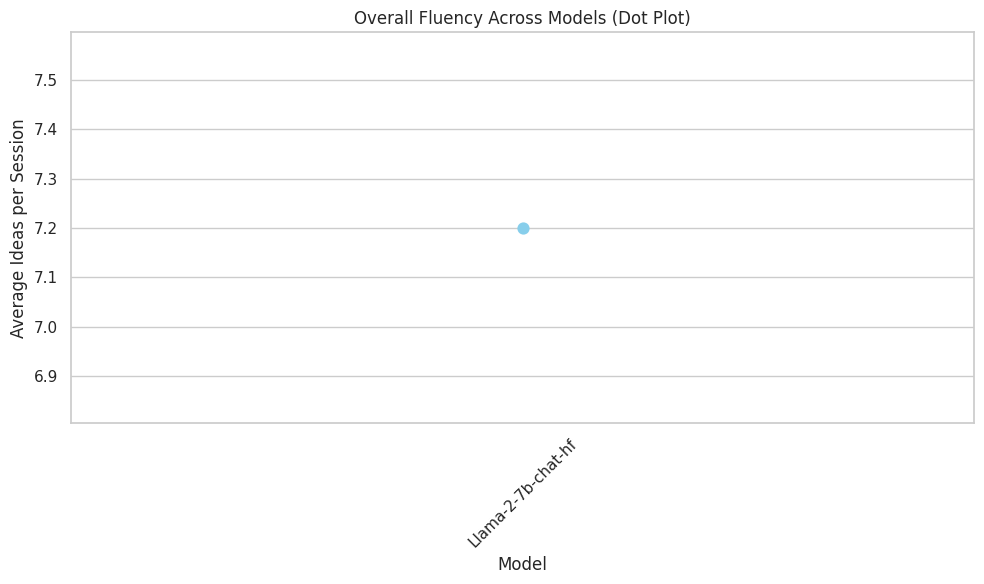

                model  item  Average Ideas per Session      SEM
0  Llama-2-7b-chat-hf  tire                        7.2  0.61101


<ipython-input-21-daa092bafdcf>:30: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='model', y='Average Ideas per Session', hue='item', data=fluency_by_item_stats, dodge=True, join=False, capsize=0.2, errwidth=1, markers='o', palette='deep')
<ipython-input-21-daa092bafdcf>:30: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='model', y='Average Ideas per Session', hue='item', data=fluency_by_item_stats, dodge=True, join=False, capsize=0.2, errwidth=1, markers='o', palette='deep')


ZeroDivisionError: float division by zero

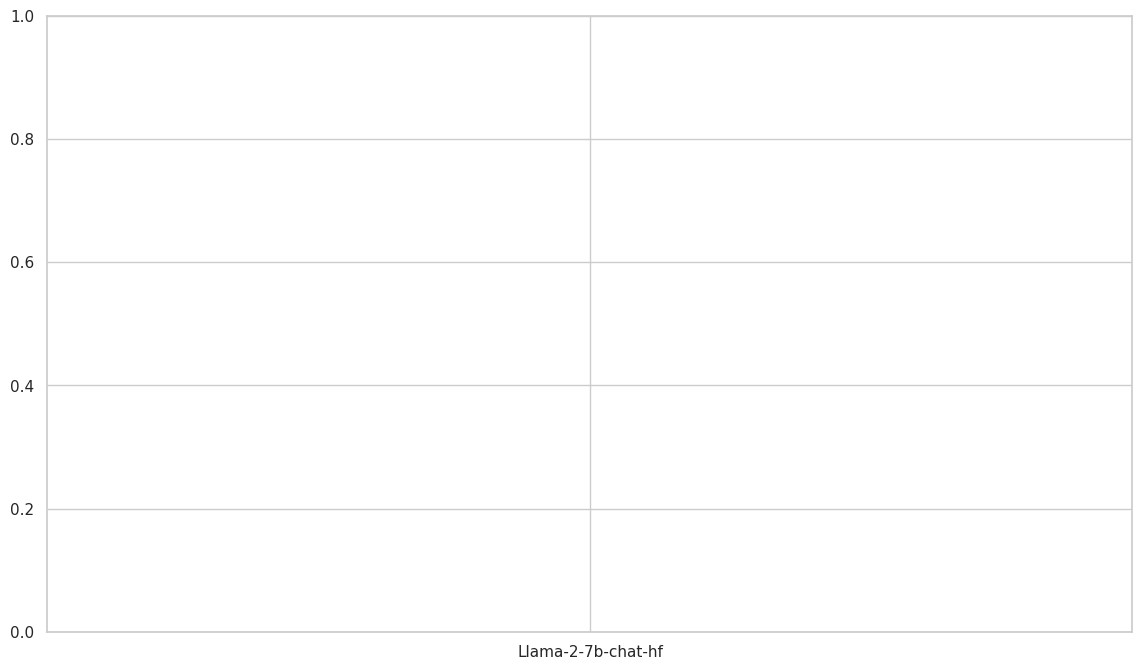

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import sem

# Assuming df_combined is your dataset including 'model', 'session_id', 'item', and 'diversity' columns

# Calculating the average number of ideas per session for each model, considering unique session-item combinations
fluency_overall = df_combined.groupby(['model', 'session_id', 'item']).size().reset_index(name='Ideas')
fluency_overall_stats = fluency_overall.groupby('model')['Ideas'].agg(['mean', sem]).reset_index().rename(columns={'mean': 'Average Ideas per Session', 'sem': 'SEM'})

# Calculating the average number of ideas per session by model and item
fluency_by_item_stats = df_combined.groupby(['model', 'item', 'session_id']).size().reset_index(name='Ideas')
fluency_by_item_stats = fluency_by_item_stats.groupby(['model', 'item'])['Ideas'].agg(['mean', sem]).reset_index().rename(columns={'mean': 'Average Ideas per Session', 'sem': 'SEM'})
print(fluency_by_item_stats)
# Plotting Overall Fluency Across Models with SEM
plt.figure(figsize=(10, 6))
sns.pointplot(x='model', y='Average Ideas per Session', data=fluency_overall_stats, join=False, capsize=0.2, errwidth=1, color='skyblue', markers='o')
plt.xticks(rotation=45)
plt.title('Overall Fluency Across Models (Dot Plot)')
plt.xlabel('Model')
plt.ylabel('Average Ideas per Session')
plt.tight_layout()
plt.show()

# Plotting Fluency by Model and Item with SEM
print(fluency_by_item_stats)
plt.figure(figsize=(14, 8))
sns.pointplot(x='model', y='Average Ideas per Session', hue='item', data=fluency_by_item_stats, dodge=True, join=False, capsize=0.2, errwidth=1, markers='o', palette='deep')
plt.xticks(rotation=45)
plt.title('Fluency Across Models by Item (Dot Plot)')
plt.xlabel('Model')
plt.ylabel('Average Ideas per Session')
plt.tight_layout()
plt.show()

# Printing the Tables
print("Overall Fluency Across Models:")
print(fluency_overall_stats)
print("\nFluency Across Models by Item:")
print(fluency_by_item_stats)
